<a href="https://colab.research.google.com/github/Timoh-top/sql-eda-global-superstore/blob/main/SQL_EDA_Global_Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing pandasql
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=1a61e869e6de5a07556231ad653ceff6aa8c9e4bb585a4b18658ea5b99369943
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [13]:
# importing the libraries
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv("/content/superstore.csv")

In [6]:
# Checking the loaded data
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [8]:
df['记录数'].drop()

array([1])

In [9]:
# dropping the 记录数 column
df.drop(columns=['记录数'], inplace=True)

In [12]:
# Top 5
query = """
SELECT State, SUM(Sales) AS Total_Sales
FROM df
GROUP BY State
ORDER BY Total_Sales DESC
LIMIT 5;
"""
pysqldf(query)

,State,Total_Sales
0,England,485166
1,California,457731
2,Ile-de-France,317818
3,New York,310914
4,New South Wales,270509


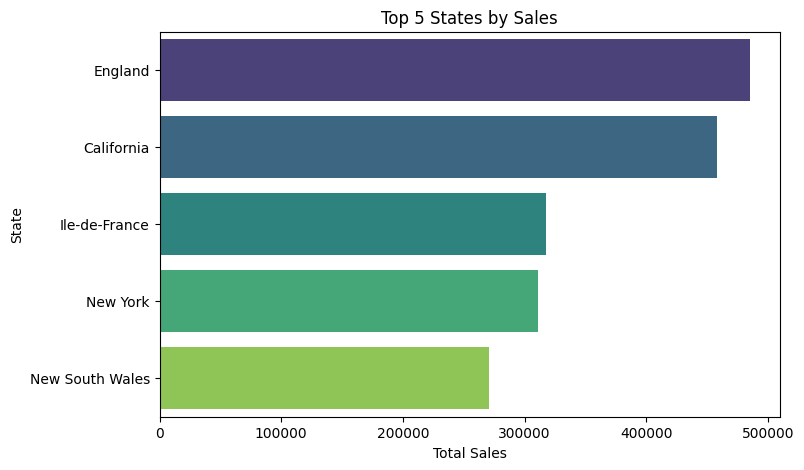

In [16]:
# visualizing the result
plt.figure(figsize=(8,5))
sns.barplot(data=pysqldf(query), x='Total_Sales', y='State', palette='viridis')
plt.title('Top 5 States by Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

In [17]:
# Top 5 states by profit
query  ="""
SELECT state, SUM(profit) AS TOTAL_PROFIT
FROM df
GROUP BY state
ORDER BY TOTAL_PROFIT DESC
LIMIT 5;
"""
pysqldf(query)

,State,TOTAL_PROFIT
0,England,99907.7310
1,California,76381.3871
2,New York,74038.5486
3,Ile-de-France,44055.9240
4,New South Wales,43695.9840


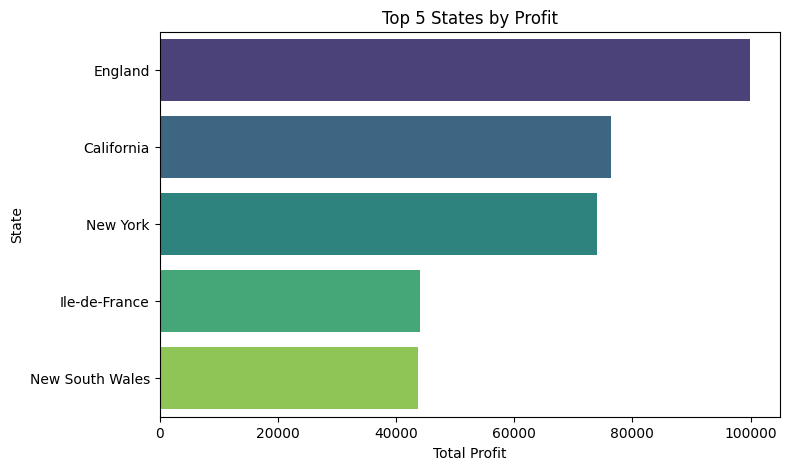

In [18]:
# visualizing the result
plt.figure(figsize=(8,5))
sns.barplot(data=pysqldf(query), x='TOTAL_PROFIT', y='State', palette='viridis')
plt.title('Top 5 States by Profit')
plt.xlabel('Total Profit')
plt.ylabel('State')
plt.show()

In [25]:
# Profit by customer segment

query = """
SELECT Segment, SUM(Profit) AS Total_Profit
FROM df
GROUP BY Segment
ORDER BY Total_Profit DESC;
"""
pysqldf(query)

,Segment,Total_Profit
0,Consumer,749239.78206
1,Corporate,441208.32866
2,Home Office,277009.18056


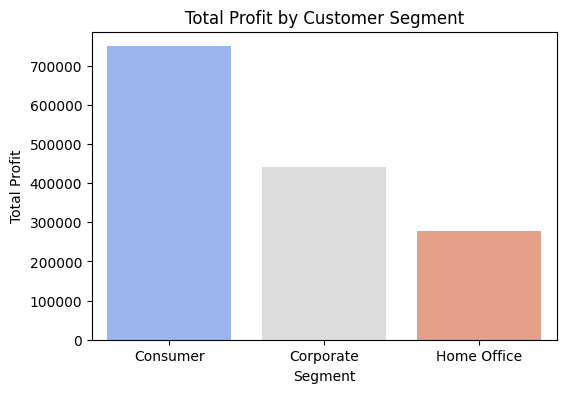

In [24]:
# visualization of segment by profit
plt.figure(figsize=(6,4))
sns.barplot(data=pysqldf(query), x='Segment', y='Total_Profit', palette='coolwarm')
plt.title('Total Profit by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

In [26]:
# profit margin by category
query = """
SELECT Category,
       SUM(Sales) AS Total_Sales,
       SUM(Profit) AS Total_Profit,
       (SUM(Profit)/SUM(Sales))*100 AS Profit_Margin_Percent
FROM df
GROUP BY Category
ORDER BY Profit_Margin_Percent DESC;
"""
pysqldf(query)

,Category,Total_Sales,Total_Profit,Profit_Margin_Percent
0,Technology,4744691,663778.73318,13.989925
1,Office Supplies,3787330,518473.83430,13.689693
2,Furniture,4110884,285204.72380,6.937795


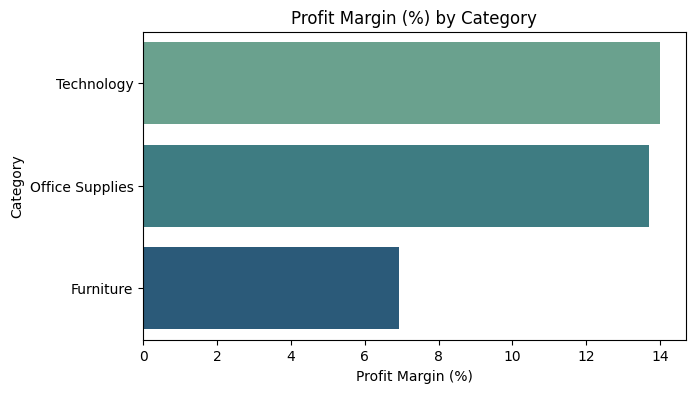

In [27]:
plt.figure(figsize=(7,4))
sns.barplot(data=pysqldf(query),
            x='Profit_Margin_Percent',
            y='Category',
            palette='crest')

plt.title('Profit Margin (%) by Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Category')
plt.show()

In [36]:
# converting order date to Datetime
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Month'] = df['Order.Date'].dt.to_period('M').astype(str)

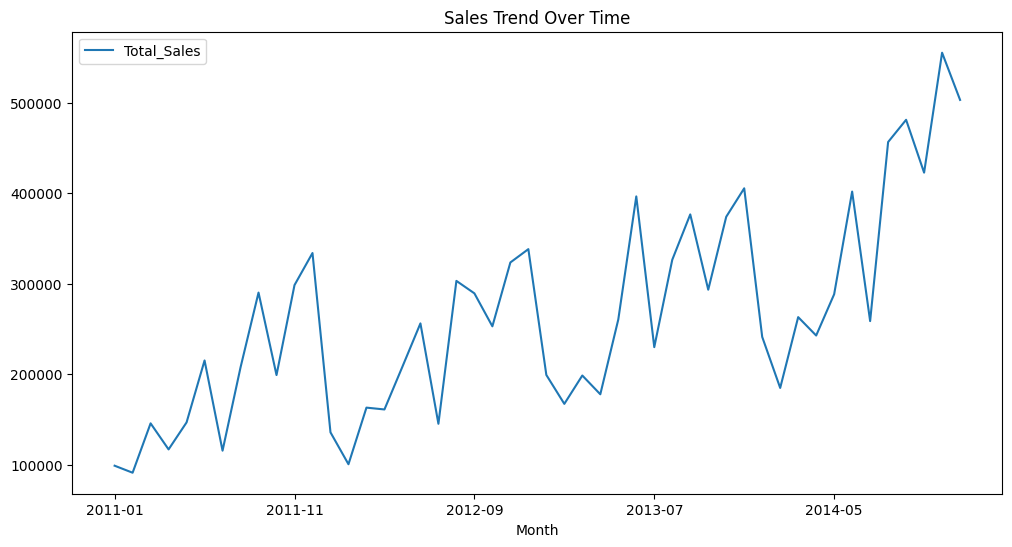

In [39]:
query = """
SELECT Month, SUM(Sales) AS Total_Sales
FROM df
GROUP BY Month
ORDER BY Month;
"""
sales_trend = pysqldf(query)
sales_trend.plot(x='Month', y='Total_Sales', kind='line', figsize=(12,6), title='Sales Trend Over Time');

**KEY INSIGHTS**

England has the highest total sales and profit among all states.

The Consumer segment drives the most profit, followed by Corporate.

Technology products have the highest profit margin, indicating strategic focus potential.

Sales peak during holiday seasons, reflecting strong seasonal patterns.